# <u>Recognizing Handwritten Digits on MNIST Dataset using KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1 :- Data Preparation

In [3]:
#df = pd.read_csv("MNIST(42000, 784).csv")
print(df.shape)

(42000, 785)


In [4]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


** Each image consists of (28 X 28) pixels means values with 28 rows and 28 corresponding columns but reshaped to (784) columns for each row and 'label' refers to the corresponding digit written in that image**

In [5]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [6]:
# Converting dataframe to an numpy array
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
X = data[:, 1:]  # leaving the 0th column
Y = data[:, 0]   # only 0th column

print(X.shape, Y.shape)

(42000, 784) (42000,)


#### Data Split (Train and Test)

In [8]:
# 80% for training and 20% for testing
split = int(0.8 * X.shape[0])

X_train = X[:split, :]
Y_train = Y[:split]

X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(33600, 784) (33600,) (8400, 784) (8400,)


### Step 2 :- Visualize some Training Data

In [9]:
def draw_image(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap = 'gray')  # 'viridis/coolwarm/.... for colored image'
    plt.show()

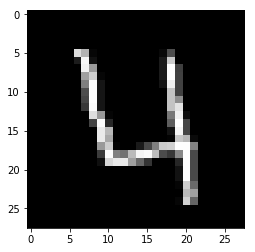

In [10]:
draw_image(X_train[3])

### Setp 3 :- KNN Implementation

we have a large datasets incase 784 column values means we are having our data in 784 dimension of space, We will be having 9 clusters (0 to 9), The query image will fall in that cluseter or the distance of those images will tally or be minimal whose values at different pixels is quite samilar. 

In [11]:
def distance(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def knn(X, Y, query_point, k = 5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = distance(query_point, X[i])
        # appending the distance and label of that datapoint x[i]
        # because sorting will be done based on the distance and mejority will be counted based on labels.
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    # Nearest K datapoints
    vals = vals[:k]
    
    vals = np.array(vals)
    
    # Getting the count of each unique lables
    new_vals = np.unique(vals[:,1], return_counts = True)
   
    # getting the index of max most element from count array
    index = new_vals[1].argmax()
    # get the corresponding value at location index
    pred = new_vals[0][index]
     
    return(pred)

### Step 4 :- Make Predictions

In [21]:
prediction1 = knn(X_train, Y_train, X_test[1])

In [22]:
print(int(prediction1))

7


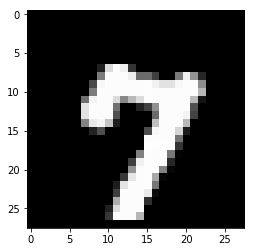

7


In [23]:
# Lets Look is the output correct
draw_image(X_test[1])
print(Y_test[1])

In [24]:
prediction2 = knn(X_train, Y_train, X_test[0])

In [20]:
print(int(prediction2))

0


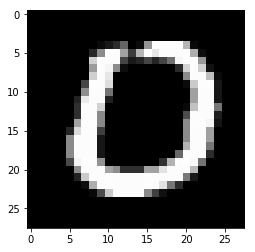

0


In [25]:
# Lets Look is the output correct
draw_image(X_test[0])
print(Y_test[0])

In [18]:
#We are getting our test data prediction correctly
